# CRYPTOCURRENCY CLOSING PRICE PREDICTION

## PYTHON CAPSTONE PROJECT

### PROBLEM
Crypto currencies have a highly volatile nature and makes their prices unpredictable. This volatility petrifies new entrants from entering the crypto currency markets and has caused huge losses to investors.

### SOLUTION
This objective of this project is to build predictive models that can optimally predict cryptocurrency closing price with the given data
### APPROACH
Several steps will be taken to achieve this objective and they include
* Data preparation and preprocessing
* Data cleaning and transformation
* Exploratory Data analysis 
* Feature selection
* Model building and evaluation
* Cross validation and hyperparameter tuning
* Making predictions

### DATA PREPARATION AND INSPECTION

In [1]:
#Importing necessary libraries

import sklearn

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as plt

In [2]:
#loading the data sets
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
#previewing the train dataset
train.head(10)

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216
5,ID_325hxw,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,145,NaN,NaN,NaN
6,ID_325m2L,1,9697.250948,9712.247413,9697.250948,1.231231e+09,1.767035e+11,1079.0,661.0,66.0,...,656.0,2.0,1.0,1.0,NaN,NaN,4713,1.159070,2.807819e+11,9712.247413
7,ID_326vWj,1,8200.324549,8200.324549,8177.618366,4.763495e+08,1.473169e+11,981.0,727.0,20.0,...,759.0,2.0,1.0,1.0,NaN,NaN,2292,-0.304804,2.218058e+11,8178.009040
8,ID_3277jX,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,175,NaN,NaN,NaN
9,ID_327FsT,1,46631.400268,46817.417045,46525.810946,3.049440e+09,8.678017e+11,1982.0,1333.0,93.0,...,1141.0,3.0,1.0,1.0,10.0,3.0,14723,0.470728,1.434610e+12,46570.843691


In [4]:
#Previewing test dataset
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,...,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,...,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


In [5]:
#checking the shapes of the datasets
train.shape, test.shape

((12632, 49), (6222, 48))

In [6]:
#checking the info of the train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12632 non-null  object 
 1   asset_id                 12632 non-null  int64  
 2   open                     8617 non-null   float64
 3   high                     8617 non-null   float64
 4   low                      8617 non-null   float64
 5   volume                   8605 non-null   float64
 6   market_cap               8379 non-null   float64
 7   url_shares               8575 non-null   float64
 8   unique_url_shares        8575 non-null   float64
 9   reddit_posts             12391 non-null  float64
 10  reddit_posts_score       12391 non-null  float64
 11  reddit_comments          12402 non-null  float64
 12  reddit_comments_score    12402 non-null  float64
 13  tweets                   8584 non-null   float64
 14  tweet_spam            

After inspecting the train set, all the data types are correct

In [7]:
#checking the info of the test set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6222 non-null   object 
 1   asset_id                 6222 non-null   int64  
 2   open                     4304 non-null   float64
 3   high                     4304 non-null   float64
 4   low                      4304 non-null   float64
 5   volume                   4302 non-null   float64
 6   market_cap               4191 non-null   float64
 7   url_shares               4285 non-null   float64
 8   unique_url_shares        4285 non-null   float64
 9   reddit_posts             6122 non-null   float64
 10  reddit_posts_score       6122 non-null   float64
 11  reddit_comments          6109 non-null   float64
 12  reddit_comments_score    6109 non-null   float64
 13  tweets                   4289 non-null   float64
 14  tweet_spam              

After inspecting the test set, all the data types are correct

#### Checking for missing values

In [8]:
#Checking missing values in train data
train.isna().sum()

id                            0
asset_id                      0
open                       4015
high                       4015
low                        4015
volume                     4027
market_cap                 4253
url_shares                 4057
unique_url_shares          4057
reddit_posts                241
reddit_posts_score          241
reddit_comments             230
reddit_comments_score       230
tweets                     4048
tweet_spam                 4048
tweet_followers            4058
tweet_quotes               4058
tweet_retweets             4058
tweet_replies              4058
tweet_favorites            4058
tweet_sentiment1           4048
tweet_sentiment2           4048
tweet_sentiment3           4048
tweet_sentiment4           4048
tweet_sentiment5           4048
tweet_sentiment_impact1    4048
tweet_sentiment_impact2    4048
tweet_sentiment_impact3    4048
tweet_sentiment_impact4    4048
tweet_sentiment_impact5    4048
social_score               4048
average_

In [9]:
#Checking missing values in test data
test.isna().sum()

id                            0
asset_id                      0
open                       1918
high                       1918
low                        1918
volume                     1920
market_cap                 2031
url_shares                 1937
unique_url_shares          1937
reddit_posts                100
reddit_posts_score          100
reddit_comments             113
reddit_comments_score       113
tweets                     1933
tweet_spam                 1933
tweet_followers            1935
tweet_quotes               1935
tweet_retweets             1935
tweet_replies              1935
tweet_favorites            1935
tweet_sentiment1           1933
tweet_sentiment2           1933
tweet_sentiment3           1933
tweet_sentiment4           1933
tweet_sentiment5           1933
tweet_sentiment_impact1    1933
tweet_sentiment_impact2    1933
tweet_sentiment_impact3    1933
tweet_sentiment_impact4    1933
tweet_sentiment_impact5    1933
social_score               1933
average_

In [10]:
#checking the descriptive statistics of the train set
train.describe().T

,count,mean,std,min,25%,50%,75%,max
asset_id,12632.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
open,8617.0,1.550482e+04,1.410571e+04,4.545088e+03,8.405552e+03,9.671832e+03,1.307720e+04,6.140893e+04
high,8617.0,1.555948e+04,1.419111e+04,4.589712e+03,8.437392e+03,9.689752e+03,1.308984e+04,6.150737e+04
low,8617.0,1.544959e+04,1.402265e+04,4.267292e+03,8.378513e+03,9.648410e+03,1.304711e+04,6.107319e+04
volume,8605.0,1.300724e+09,1.711922e+09,2.373622e+08,6.196589e+08,9.820621e+08,1.611974e+09,5.185678e+10
market_cap,8379.0,2.826010e+11,2.663052e+11,8.393765e+10,1.506098e+11,1.755833e+11,2.191438e+11,1.140905e+12
url_shares,8575.0,1.247310e+03,5.931083e+02,2.000000e+00,8.570000e+02,1.124000e+03,1.507500e+03,1.010700e+04
unique_url_shares,8575.0,7.578629e+02,3.036274e+02,2.000000e+00,5.590000e+02,7.030000e+02,8.930000e+02,4.880000e+03
reddit_posts,12391.0,3.652772e+01,3.161028e+01,1.000000e+00,1.300000e+01,2.800000e+01,5.000000e+01,5.000000e+02
reddit_posts_score,12391.0,3.239898e+02,6.774196e+02,0.000000e+00,7.900000e+01,1.560000e+02,3.280000e+02,3.055900e+04


In [11]:
#checking the descriptive statistics of the test set
test.describe()

,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
count,6222.0,4304.000000,4304.000000,4304.000000,4.302000e+03,4.191000e+03,4285.000000,4285.000000,6122.000000,6122.000000,...,4168.000000,4064.000000,4064.000000,4064.000000,4064.000000,1451.000000,2337.000000,6222.000000,4151.000000,4.180000e+03
mean,1.0,15054.297624,15103.810538,14999.713795,1.290371e+09,2.743587e+11,1238.791832,753.067678,35.728520,327.871774,...,1.000720,811.893701,2.125000,1.015010,1.005413,1.354928,3.414206,3896.704275,0.314752,4.477426e+11
std,0.0,13832.427474,13911.601934,13744.393441,1.928771e+09,2.612154e+11,604.437791,316.087029,30.300927,867.006409,...,0.026822,220.406920,0.464465,0.121607,0.073385,0.905238,6.521994,4859.988807,3.645685,4.501363e+11
min,1.0,4910.805430,4981.827827,4794.964538,2.848978e+08,8.862308e+10,1.000000,1.000000,1.000000,0.000000,...,1.000000,158.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-38.296128,1.386712e+11
25%,1.0,8328.747189,8346.180632,8308.561180,6.161449e+08,1.489114e+11,845.000000,553.000000,13.000000,78.000000,...,1.000000,668.000000,2.000000,1.000000,1.000000,1.000000,1.000000,253.250000,-1.259532,2.244002e+11
50%,1.0,9592.641478,9602.395750,9569.265556,9.376669e+08,1.746268e+11,1123.000000,699.000000,28.000000,153.000000,...,1.000000,827.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3360.500000,0.218129,2.704375e+11
75%,1.0,11880.104999,11890.085273,11868.134788,1.525557e+09,2.168739e+11,1488.000000,874.000000,49.000000,322.000000,...,1.000000,964.250000,2.000000,1.000000,1.000000,1.000000,4.000000,5100.000000,1.780624,3.718909e+11
max,1.0,61158.881991,61568.793988,60732.518436,5.830593e+10,1.576560e+12,8852.000000,5071.000000,215.000000,43760.000000,...,2.000000,1480.000000,11.000000,2.000000,2.000000,12.000000,126.000000,138363.000000,28.375739,2.059298e+12


### Checking unique values

In [12]:
train.volume_24h_rank.unique()

array([ 2., nan,  3.,  1.,  4.,  9., 10.,  5.])

In [13]:
train.social_volume_24h_rank.unique()

array([ 1., nan,  2.])

In [14]:
train.social_score_24h_rank.unique()

array([ 1., nan,  2.])

In [15]:
train.medium.unique()

array([ 2., nan, 10.,  1.,  3.,  8.,  4.,  5.,  9.,  7., 12.,  6.])

In [16]:
train.youtube.unique()    

array([  5.,  nan,   2.,   3.,   4.,   1.,   8.,   6.,   9.,  62.,  13.,
        10.,  15.,  16.,   7.,  12.,  27.,  19.,  21.,  33.,  11.,  32.,
        14.,  18.,  42.,  22.,  17.,  20.,  23.,  37.,  35.,  26.,  39.,
        30.,  25.,  63.,  28.,  29.,  31.,  36.,  79.,  38.,  48., 132.,
        24.,  71.,  34., 178.,  49.,  57.,  40.])

### DATA CLEANING

### Filling missing values

In [17]:
#Subsetting the column "id" in the train and test sets
train_id = train[['id']]
test_id = test[['id']]

In [18]:
#Dropping unimportant columns in the test and train set
train = train.drop(['id', 'asset_id'], axis = 1)
test = test.drop(['id', 'asset_id'], axis = 1)

In [19]:
#Checking the descriptive statistics of 'close' before filling NaN
train.close.describe()

count     8617.000000
mean     15507.395867
std      14112.405285
min       4267.292258
25%       8402.681367
50%       9667.590065
75%      13066.731701
max      61259.670876
Name: close, dtype: float64

In [20]:
#importing library for imputation
from sklearn.impute import KNNImputer

In [21]:
#filling missing values in the target variable
imputer = KNNImputer(n_neighbors = 3, weights = 'uniform')
train['close'] = imputer.fit_transform(train[['close']])
train.close

0         9428.279323
1         7967.567267
2        49120.738484
3        15507.395867
4        10384.798216
             ...     
12627    15507.395867
12628     7303.640282
12629     8828.440234
12630     9658.204385
12631    11795.042557
Name: close, Length: 12632, dtype: float64

In [22]:
#Checking the descriptive statistics after filling NaN
train.close.describe()

count    12632.000000
mean     15507.395867
std      11655.610279
min       4267.292258
25%       9164.102748
50%      11867.678610
75%      15507.395867
max      61259.670876
Name: close, dtype: float64

In [23]:
#confirming replacement of NaNs
train['close'].isna().sum()

0

In [24]:
#splitting the train data into features and target
train_features = train.drop('close', axis = 1)
train_target = train['close']

#### Filling missing values in the train set

In [25]:
#importing libraries for multivariate imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [26]:
#fitting the model to the features
imp = IterativeImputer(max_iter=1000, random_state=0)

imp.fit(train_features)

IterativeImputer(max_iter=1000, random_state=0)

In [27]:
#transforming the features
train_trans = imp.transform(train_features)
train_trans

array([[ 9.42284908e+03,  9.42849063e+03,  9.42284908e+03, ...,
         4.42200000e+03,  1.43451613e+00,  2.81806568e+11],
       [ 7.98535928e+03,  7.99205992e+03,  7.96756727e+03, ...,
         2.15900000e+03, -2.45950730e+00,  2.12689713e+11],
       [ 4.92020338e+04,  4.93945935e+04,  4.90680570e+04, ...,
         1.06020000e+04,  4.94244779e+00,  1.53071178e+12],
       ...,
       [ 8.81112163e+03,  8.83256017e+03,  8.75460257e+03, ...,
         5.78700000e+03, -1.67008251e-01,  2.49342093e+11],
       [ 9.66151468e+03,  9.66219660e+03,  9.64513393e+03, ...,
         4.67900000e+03,  2.70643173e+00,  2.75754736e+11],
       [ 1.18463686e+04,  1.18463686e+04,  1.17950426e+04, ...,
         3.52300000e+03, -1.57545445e+00,  3.83672760e+11]])

In [28]:
#creating a dataframe of the transformed data
train_features = pd.DataFrame(train_trans, columns=train_features.columns)

train_features.head()

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.00000,817.000000,55.0,105.0,61.0,...,1.000000,606.000000,2.000000,1.000000,1.000000,2.000000,5.000000,4422.0,1.434516,2.818066e+11
1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.00000,544.000000,20.0,531.0,103.0,...,1.000000,1022.699491,1.959303,1.018257,1.006572,1.263097,4.173095,2159.0,-2.459507,2.126897e+11
2,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.00000,975.000000,72.0,1152.0,187.0,...,1.000000,692.000000,3.000000,1.000000,1.000000,1.835537,1.225117,10602.0,4.942448,1.530712e+12
3,15272.088312,15390.786704,15168.439213,1.308344e+09,2.858544e+11,-873.43133,-692.029743,17.0,424.0,268.0,...,1.002444,799.172108,2.273633,1.011598,1.026800,1.807559,3.961748,285.0,-1.531284,4.665956e+11
4,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.00000,638.000000,24.0,42.0,50.0,...,1.000000,749.000000,2.000000,1.000000,1.000000,1.177933,2.000000,3996.0,2.609576,3.386925e+11


In [29]:
#Confirming missing values have been filled
train.isna().sum()

open                       4015
high                       4015
low                        4015
volume                     4027
market_cap                 4253
url_shares                 4057
unique_url_shares          4057
reddit_posts                241
reddit_posts_score          241
reddit_comments             230
reddit_comments_score       230
tweets                     4048
tweet_spam                 4048
tweet_followers            4058
tweet_quotes               4058
tweet_retweets             4058
tweet_replies              4058
tweet_favorites            4058
tweet_sentiment1           4048
tweet_sentiment2           4048
tweet_sentiment3           4048
tweet_sentiment4           4048
tweet_sentiment5           4048
tweet_sentiment_impact1    4048
tweet_sentiment_impact2    4048
tweet_sentiment_impact3    4048
tweet_sentiment_impact4    4048
tweet_sentiment_impact5    4048
social_score               4048
average_sentiment          4048
news                       4076
price_sc

In [30]:
#merging the features with the target after transformation
train = pd.concat([train_features, train_target], axis = 1)
train

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.000000,817.000000,55.0,105.0,61.0,...,606.000000,2.000000,1.000000,1.000000,2.000000,5.000000,4422.0,1.434516,2.818066e+11,9428.279323
1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.000000,544.000000,20.0,531.0,103.0,...,1022.699491,1.959303,1.018257,1.006572,1.263097,4.173095,2159.0,-2.459507,2.126897e+11,7967.567267
2,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.000000,975.000000,72.0,1152.0,187.0,...,692.000000,3.000000,1.000000,1.000000,1.835537,1.225117,10602.0,4.942448,1.530712e+12,49120.738484
3,15272.088312,15390.786704,15168.439213,1.308344e+09,2.858544e+11,-873.431330,-692.029743,17.0,424.0,268.0,...,799.172108,2.273633,1.011598,1.026800,1.807559,3.961748,285.0,-1.531284,4.665956e+11,15507.395867
4,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.000000,638.000000,24.0,42.0,50.0,...,749.000000,2.000000,1.000000,1.000000,1.177933,2.000000,3996.0,2.609576,3.386925e+11,10384.798216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12627,15026.707115,15108.519811,14953.702256,1.307117e+09,2.856747e+11,-886.320798,-692.742365,2.0,61.0,138.0,...,834.333681,2.250346,1.011739,1.027018,1.745983,3.773712,140.0,-1.014742,4.663007e+11,15507.395867
12628,7294.506136,7306.701928,7292.729876,3.816704e+08,1.322473e+11,605.000000,462.000000,16.0,217.0,39.0,...,1007.000000,2.000000,1.000000,1.000000,1.255177,4.092143,2020.0,-2.456887,1.978198e+11,7303.640282
12629,8811.121632,8832.560173,8754.602574,2.412260e+09,1.621298e+11,1653.000000,757.000000,74.0,249.0,60.0,...,918.000000,2.000000,1.000000,1.000000,1.000000,2.000000,5787.0,-0.167008,2.493421e+11,8828.440234
12630,9661.514681,9662.196605,9645.133934,9.861517e+08,1.774933e+11,1376.000000,657.000000,39.0,81.0,43.0,...,603.000000,2.000000,1.000000,1.000000,1.252269,9.000000,4679.0,2.706432,2.757547e+11,9658.204385


In [31]:
#checking the descriptive statistics after transformation
train.describe().T

,count,mean,std,min,25%,50%,75%,max
open,12632.0,1.536774e+04,1.165219e+04,4.545088e+03,9.166192e+03,1.187166e+04,1.515466e+04,6.140893e+04
high,12632.0,1.543298e+04,1.172258e+04,4.589712e+03,9.176127e+03,1.187988e+04,1.525762e+04,6.150737e+04
low,12632.0,1.530527e+04,1.158370e+04,4.267292e+03,9.150605e+03,1.185158e+04,1.506644e+04,6.107319e+04
volume,12632.0,1.304243e+09,1.413761e+09,2.373622e+08,7.653442e+08,1.306165e+09,1.310274e+09,5.185678e+10
market_cap,12632.0,2.840635e+11,2.170610e+11,8.393765e+10,1.675602e+11,2.201686e+11,2.857559e+11,1.140905e+12
url_shares,12632.0,5.723049e+02,1.096859e+03,-9.609261e+02,-8.293064e+02,8.740000e+02,1.309000e+03,1.010700e+04
unique_url_shares,12632.0,2.918890e+02,7.224352e+02,-7.332755e+02,-6.921917e+02,5.670000e+02,7.900000e+02,4.880000e+03
reddit_posts,12632.0,3.617887e+01,3.149980e+01,6.089067e-06,1.300000e+01,2.700000e+01,5.000000e+01,5.000000e+02
reddit_posts_score,12632.0,3.234550e+02,6.711237e+02,-4.464824e+00,8.000000e+01,1.590000e+02,3.300000e+02,3.055900e+04
reddit_comments,12632.0,1.021988e+02,8.885500e+01,1.000000e+00,4.100000e+01,6.600000e+01,1.440000e+02,1.333000e+03


In [32]:
#Confirming missing values have been replaced
train.isna().sum()

open                       0
high                       0
low                        0
volume                     0
market_cap                 0
url_shares                 0
unique_url_shares          0
reddit_posts               0
reddit_posts_score         0
reddit_comments            0
reddit_comments_score      0
tweets                     0
tweet_spam                 0
tweet_followers            0
tweet_quotes               0
tweet_retweets             0
tweet_replies              0
tweet_favorites            0
tweet_sentiment1           0
tweet_sentiment2           0
tweet_sentiment3           0
tweet_sentiment4           0
tweet_sentiment5           0
tweet_sentiment_impact1    0
tweet_sentiment_impact2    0
tweet_sentiment_impact3    0
tweet_sentiment_impact4    0
tweet_sentiment_impact5    0
social_score               0
average_sentiment          0
news                       0
price_score                0
social_impact_score        0
correlation_rank           0
galaxy_score  

#### Filling missing values in the test set

In [33]:
#fitting the model to the test set
imp = IterativeImputer(max_iter=10000, random_state=0)

imp.fit(test)

IterativeImputer(max_iter=10000, random_state=0)

In [34]:
#transforming the features
test_trans = imp.transform(test)
test_trans

array([[ 1.30809311e+04,  1.31004425e+04,  1.30453404e+04, ...,
         9.00000000e+00, -4.77195565e-01,  4.53400866e+11],
       [ 1.13350622e+04,  1.13516910e+04,  1.13350622e+04, ...,
         7.24500000e+03, -5.55698419e-01,  3.63105230e+11],
       [ 6.32256076e+03,  6.32836235e+03,  6.29471448e+03, ...,
         2.70200000e+03,  1.68936983e+00,  1.77107494e+11],
       ...,
       [ 1.33325698e+04,  1.33781837e+04,  1.32140484e+04, ...,
         1.75000000e+02, -1.52614877e+00,  4.52667272e+11],
       [ 1.32533461e+04,  1.32952325e+04,  1.31435997e+04, ...,
         6.00000000e+00, -1.44065800e+00,  4.52863887e+11],
       [ 7.05817280e+03,  7.07897335e+03,  7.05233230e+03, ...,
         3.46900000e+03, -3.28922633e+00,  1.92655684e+11]])

In [35]:
#creating a dataframe of the transformed data
test = pd.DataFrame(test_trans, columns=test.columns)

#previewing the transformed test data
test.head()

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,13080.931093,13100.442513,13045.340385,1.300203e+09,2.780995e+11,-4391.808948,-441.720392,7.0,56.0,2.0,...,1.073065,547.618881,2.954925,-57.836121,-11.881823,-67.599794,28.277047,9.0,-0.477196,4.534009e+11
1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.000000,1045.000000,64.0,213.0,51.0,...,1.000000,711.000000,2.000000,1.000000,1.000000,1.000000,1.000000,7245.0,-0.555698,3.631052e+11
2,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.000000,255.000000,11.0,72.0,30.0,...,1.000000,715.000000,2.000000,1.000000,1.000000,1.231122,4.655398,2702.0,1.689370,1.771075e+11
3,13408.951150,13461.612444,13265.637671,1.298625e+09,2.775122e+11,-4390.132518,-446.559583,8.0,96.0,217.0,...,1.072029,514.922947,2.999754,-57.880531,-11.893054,-68.908613,28.757744,225.0,-1.835592,4.524367e+11
4,13149.598897,13173.508891,13096.069896,1.300028e+09,2.780435e+11,-4367.315344,-446.522812,26.0,49.0,33.0,...,1.073187,555.143671,2.960397,-57.890171,-11.894165,-67.903265,28.355364,59.0,-0.707583,4.533107e+11


In [36]:
#checking the descriptive statistics after transformation
test.describe().T

,count,mean,std,min,25%,50%,75%,max
open,6222.0,1.451775e+04,1.153251e+04,4.910805e+03,9.098038e+03,1.164567e+04,1.338699e+04,6.115888e+04
high,6222.0,1.456614e+04,1.159839e+04,4.981828e+03,9.112642e+03,1.165326e+04,1.344270e+04,6.156879e+04
low,6222.0,1.444499e+04,1.146124e+04,4.794965e+03,9.082621e+03,1.163246e+04,1.325126e+04,6.073252e+04
volume,6222.0,1.293297e+09,1.603799e+09,2.848978e+08,7.440198e+08,1.298323e+09,1.300197e+09,5.830593e+10
market_cap,6222.0,2.760194e+11,2.146652e+11,8.862308e+10,1.658865e+11,2.156631e+11,2.777913e+11,1.576560e+12
url_shares,6222.0,-5.159512e+02,2.661109e+03,-5.987045e+03,-4.382240e+03,8.740000e+02,1.289000e+03,8.852000e+03
unique_url_shares,6222.0,3.800025e+02,6.141701e+02,-4.895295e+02,-4.422048e+02,5.670000e+02,7.850000e+02,5.071000e+03
reddit_posts,6222.0,3.526584e+01,3.047432e+01,-1.480973e+02,1.300000e+01,2.700000e+01,4.900000e+01,2.150000e+02
reddit_posts_score,6222.0,3.275029e+02,8.603274e+02,-6.650867e+02,7.900000e+01,1.560000e+02,3.260000e+02,4.376000e+04
reddit_comments,6222.0,1.010855e+02,8.987529e+01,1.000000e+00,4.100000e+01,6.500000e+01,1.470000e+02,1.092000e+03


In [37]:
#Checking for missing values
test.isna().sum()

open                       0
high                       0
low                        0
volume                     0
market_cap                 0
url_shares                 0
unique_url_shares          0
reddit_posts               0
reddit_posts_score         0
reddit_comments            0
reddit_comments_score      0
tweets                     0
tweet_spam                 0
tweet_followers            0
tweet_quotes               0
tweet_retweets             0
tweet_replies              0
tweet_favorites            0
tweet_sentiment1           0
tweet_sentiment2           0
tweet_sentiment3           0
tweet_sentiment4           0
tweet_sentiment5           0
tweet_sentiment_impact1    0
tweet_sentiment_impact2    0
tweet_sentiment_impact3    0
tweet_sentiment_impact4    0
tweet_sentiment_impact5    0
social_score               0
average_sentiment          0
news                       0
price_score                0
social_impact_score        0
correlation_rank           0
galaxy_score  

All missing values have been filled. Both test and train sets are clean.

### EXPLORATORY DATA ANALYSIS

#### Visualization

In [38]:
#importing libraries for visualization
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

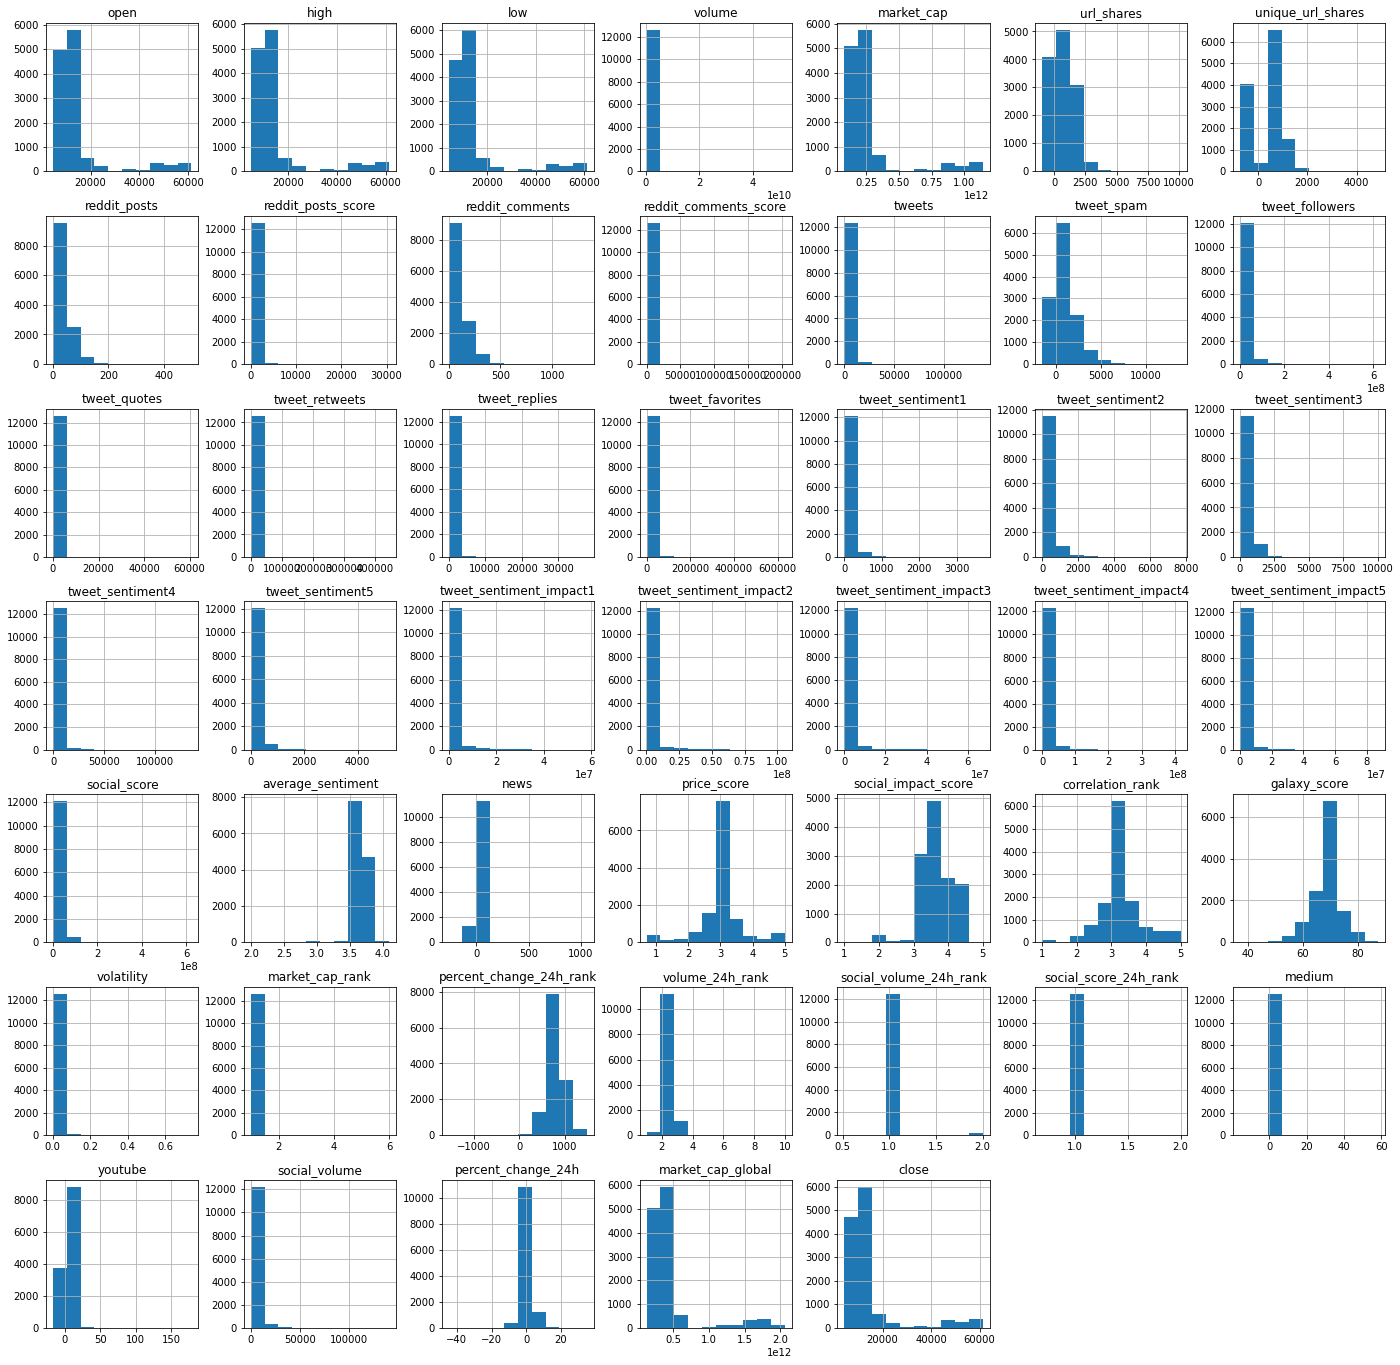

In [39]:
#plotting a histogram of all variables
train.hist(figsize=(24, 24))
plt.show()

Histograms plotted revealed that volume, medium, tweet followers, social_volume_24h_rank, social_score_24h_rank,and market cap have normal distributions while open, high, low, market_cap, reddit_posts, reddit_posts_score, reddit_comments_score, tweets, tweet_spam, tweet_quotes, tweet_retweets, tweet_replies, tweet_favorites, tweet_sentiment2, tweet_sentiment3, tweet_sentiment4, tweet_sentiment5, tweet_sentiment_impact2, tweet_sentiment_impact3, tweet_sentiment_impact4, tweet_sentiment_impact5, social_score, news, social_impact_score, galaxy_score, volatility, volume_24h_rank,  social_volume, market_cap_global, close are all skewed distributions to the right.
On the other hand, url_shares, unique_url_shares, reddit_comments, tweet_sentiment_1, tweet_sentiment_impact, correlation_rank, percent_change_24h rank, youtube, and average sentiments percent_change_24h have distributions that are skewed to the left.

In [40]:
#importing libraries for visualization
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

Text(0, 0.5, 'close')

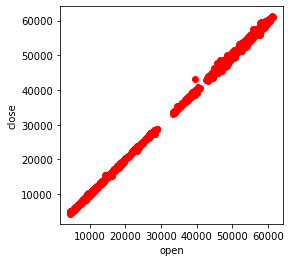

In [41]:
#plotting a scatterplot of open vs close
plt.figure(figsize=(4, 4))

plt.scatter(train['open'],train['close'], color='r')

plt.xlabel('open')
plt.ylabel('close')

From this scatterplot, it is observed that a linear relationship exists between open and close. This is because closing price increases as opening increases.

Text(0, 0.5, 'close')

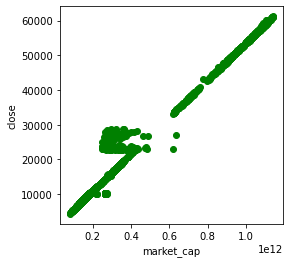

In [42]:
#plotting a scatterplot of market cap vs close
plt.figure(figsize=(4, 4))

plt.scatter(train['market_cap'], train['close'], color='g')

plt.xlabel('market_cap')
plt.ylabel('close')

From this plot, market cap rises as closing price rises. However, it is observed that there is a cluster of values when closing price is greater than 20000 but less than 30000. This means that as market cap rises from 0.2e12 to 0.6e12 , closing price does not exceed 30000.

Text(0, 0.5, 'close')

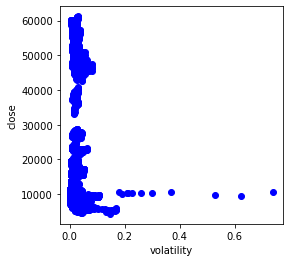

In [43]:
#plotting a scatterplot of volatility vs close
plt.figure(figsize=(4, 4))

plt.scatter( train['volatility'],train['close'], color='b')

plt.xlabel('volatility')
plt.ylabel('close')

From this plot, it is observed that volatility generally does not exceed 0.2 as closing price rises but there are unusual cases where volatility exceeds 0.6 when closing price is at 10000.

Text(0, 0.5, 'close')

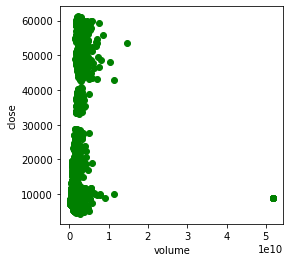

In [44]:
#plotting a scatterplot of volume vs close
plt.figure(figsize=(4, 4))

plt.scatter(train['volume'], train['close'], color='g')

plt.xlabel('volume')
plt.ylabel('close')

This plot shows that the volume of trading is between 0 and 1e10 as closing price inreases but majorly concentrated between 0 and 0.5e10 except for cases where volume of trading slightly exceed 1e10 and an extreme case where trading volume is at 5e10 when closing price is 10000.

### Detecting Outliers

open                         AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
high                       AxesSubplot(0.223936,0.799681;0.0824468x0.0803...
low                        AxesSubplot(0.322872,0.799681;0.0824468x0.0803...
volume                     AxesSubplot(0.421809,0.799681;0.0824468x0.0803...
market_cap                 AxesSubplot(0.520745,0.799681;0.0824468x0.0803...
url_shares                 AxesSubplot(0.619681,0.799681;0.0824468x0.0803...
unique_url_shares          AxesSubplot(0.718617,0.799681;0.0824468x0.0803...
reddit_posts               AxesSubplot(0.817553,0.799681;0.0824468x0.0803...
reddit_posts_score           AxesSubplot(0.125,0.703298;0.0824468x0.0803191)
reddit_comments            AxesSubplot(0.223936,0.703298;0.0824468x0.0803...
reddit_comments_score      AxesSubplot(0.322872,0.703298;0.0824468x0.0803...
tweets                     AxesSubplot(0.421809,0.703298;0.0824468x0.0803...
tweet_spam                 AxesSubplot(0.520745,0.703298;0.0824468x0.0803...

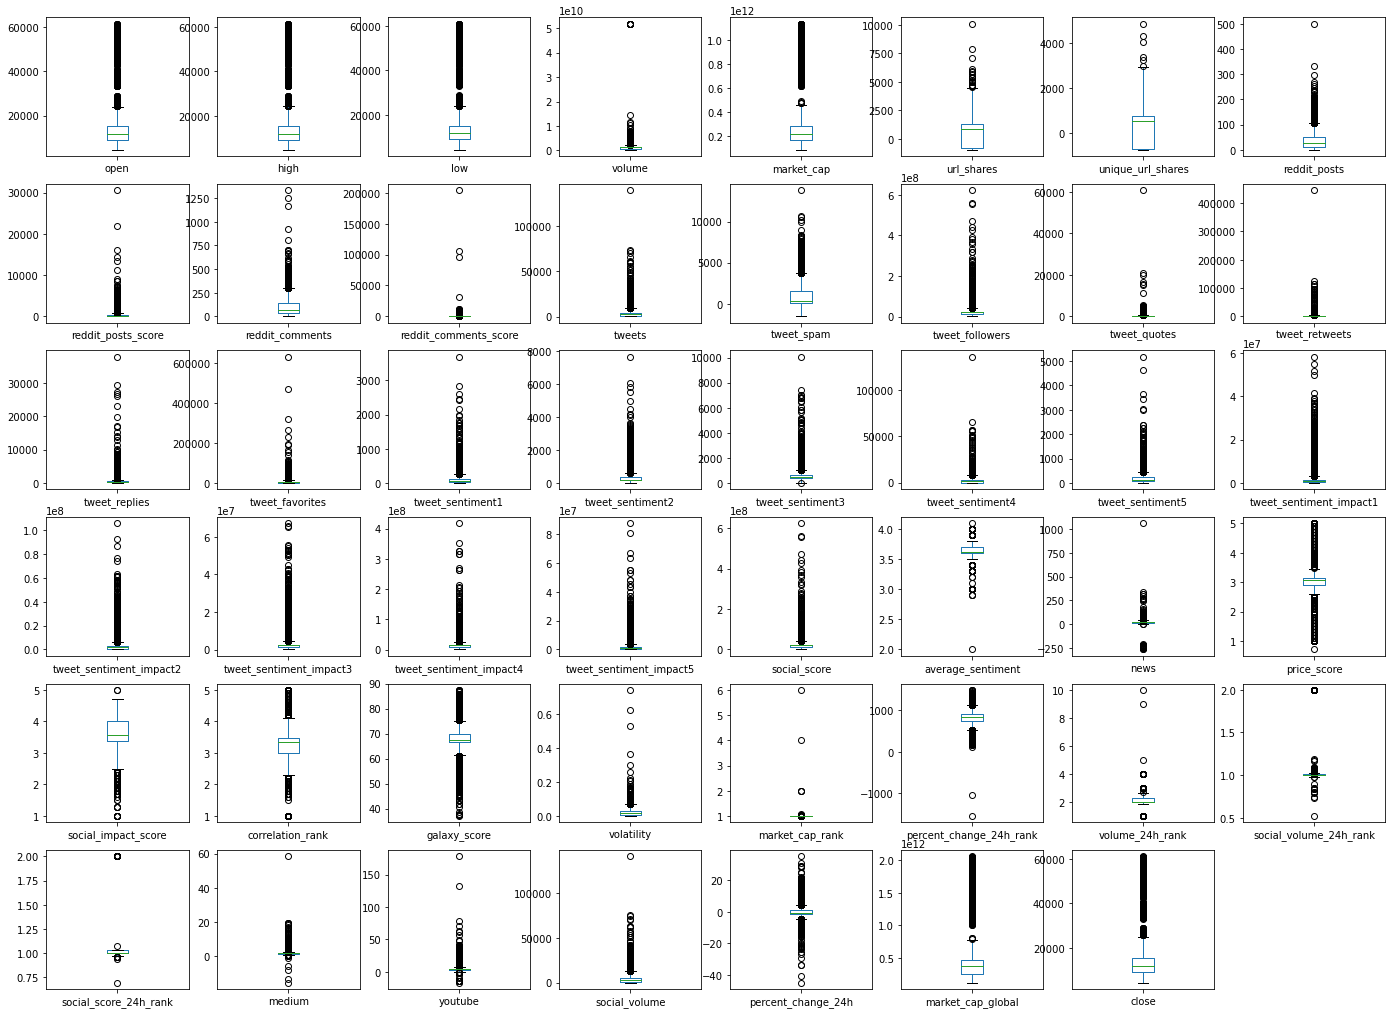

In [45]:
#Plotting box plots to visualize outliers
train.plot(kind='box', 
                   subplots=True, 
                   layout=(8, 8), 
                   sharex=False, 
                   figsize=(24, 24))

These box plots show that there are extremely high and low values in all the variables. Hence, it is evident that numerous outliers exist within this data set.

In [46]:
#saving selected columns into X
X = train.drop('close', axis = 1)
X.head(5)

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.00000,817.000000,55.0,105.0,61.0,...,1.000000,606.000000,2.000000,1.000000,1.000000,2.000000,5.000000,4422.0,1.434516,2.818066e+11
1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.00000,544.000000,20.0,531.0,103.0,...,1.000000,1022.699491,1.959303,1.018257,1.006572,1.263097,4.173095,2159.0,-2.459507,2.126897e+11
2,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.00000,975.000000,72.0,1152.0,187.0,...,1.000000,692.000000,3.000000,1.000000,1.000000,1.835537,1.225117,10602.0,4.942448,1.530712e+12
3,15272.088312,15390.786704,15168.439213,1.308344e+09,2.858544e+11,-873.43133,-692.029743,17.0,424.0,268.0,...,1.002444,799.172108,2.273633,1.011598,1.026800,1.807559,3.961748,285.0,-1.531284,4.665956e+11
4,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.00000,638.000000,24.0,42.0,50.0,...,1.000000,749.000000,2.000000,1.000000,1.000000,1.177933,2.000000,3996.0,2.609576,3.386925e+11


In [47]:
#saving the target columns into y
y = train.close
y.head()

0     9428.279323
1     7967.567267
2    49120.738484
3    15507.395867
4    10384.798216
Name: close, dtype: float64

In [48]:
#importing libraries for splitting
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [49]:
#splitting into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [50]:
#checking the shape
X_train.shape

(10105, 46)

In [51]:
#checking the shape
y_train.shape

(10105,)

In [52]:
#importing a library for automatic outlier detection
from sklearn.ensemble import IsolationForest

#Using the isolation forest algorithm for outlier detection and to predict each point
clf = IsolationForest(max_samples=150, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(X_train)
print(preds)
totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)

[1 1 1 ... 1 1 1]
Total number of outliers identified is:  1125


In [53]:
#Creating an array of predicted outliers
np.unique(preds, return_counts = True)

(array([-1,  1]), array([1125, 8980], dtype=int64))

In [54]:
#Masking the detected outliers
mask = preds != -1
X1_train, y1_train = X_train[mask], y_train[mask]

In [55]:
print(X1_train.shape, y1_train.shape)

(8980, 46) (8980,)


### FEATURE SELECTION

### Feature Correlation

In [56]:
#computing a correlation matrix
crypto_corr = train.corr()
crypto_corr

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
open,1.000000,0.999961,0.999959,0.336572,0.995259,0.268827,0.200857,0.565096,0.168920,0.466087,...,0.075689,0.772535,0.032723,-0.038422,0.127940,-0.196720,0.528736,0.099989,0.994168,0.999755
high,0.999961,1.000000,0.999925,0.337759,0.995327,0.267769,0.199680,0.565026,0.170538,0.468333,...,0.074838,0.773221,0.032880,-0.038263,0.128547,-0.196460,0.528949,0.099843,0.994150,0.999803
low,0.999959,0.999925,1.000000,0.335201,0.995231,0.269563,0.201666,0.564971,0.168094,0.464303,...,0.075716,0.772100,0.032925,-0.038529,0.127894,-0.196867,0.528701,0.101413,0.994222,0.999764
volume,0.336572,0.337759,0.335201,1.000000,0.333602,0.115260,0.075500,0.282371,0.123513,0.206677,...,-0.017872,0.252251,-0.006481,-0.039118,0.039099,-0.179146,0.266394,0.057429,0.331508,0.336846
market_cap,0.995259,0.995327,0.995231,0.333602,1.000000,0.247494,0.177785,0.548127,0.168233,0.466277,...,0.092183,0.783152,0.035074,-0.033851,0.134782,-0.194910,0.512931,0.088932,0.998958,0.995560
url_shares,0.268827,0.267769,0.269563,0.115260,0.247494,1.000000,0.975764,0.720044,0.127903,-0.198158,...,-0.054329,0.027410,0.027116,-0.162504,-0.146741,-0.113201,0.728551,0.257996,0.247268,0.253711
unique_url_shares,0.200857,0.199680,0.201666,0.075500,0.177785,0.975764,1.000000,0.661875,0.085485,-0.245385,...,-0.058594,-0.027809,0.017595,-0.165009,-0.152653,-0.098930,0.674844,0.248783,0.176548,0.184887
reddit_posts,0.565096,0.565026,0.564971,0.282371,0.548127,0.720044,0.661875,1.000000,0.236303,0.180850,...,-0.043738,0.332634,0.025489,-0.121257,-0.032513,-0.145634,0.752296,0.221691,0.543571,0.556478
reddit_posts_score,0.168920,0.170538,0.168094,0.123513,0.168233,0.127903,0.085485,0.236303,1.000000,0.274741,...,-0.050827,0.146786,0.061479,-0.016142,0.039322,0.010179,0.228178,0.031653,0.163342,0.168352
reddit_comments,0.466087,0.468333,0.464303,0.206677,0.466277,-0.198158,-0.245385,0.180850,0.274741,1.000000,...,-0.059141,0.464588,-0.004659,0.037292,0.164637,-0.036254,0.136635,-0.077918,0.459739,0.467968


<AxesSubplot:>

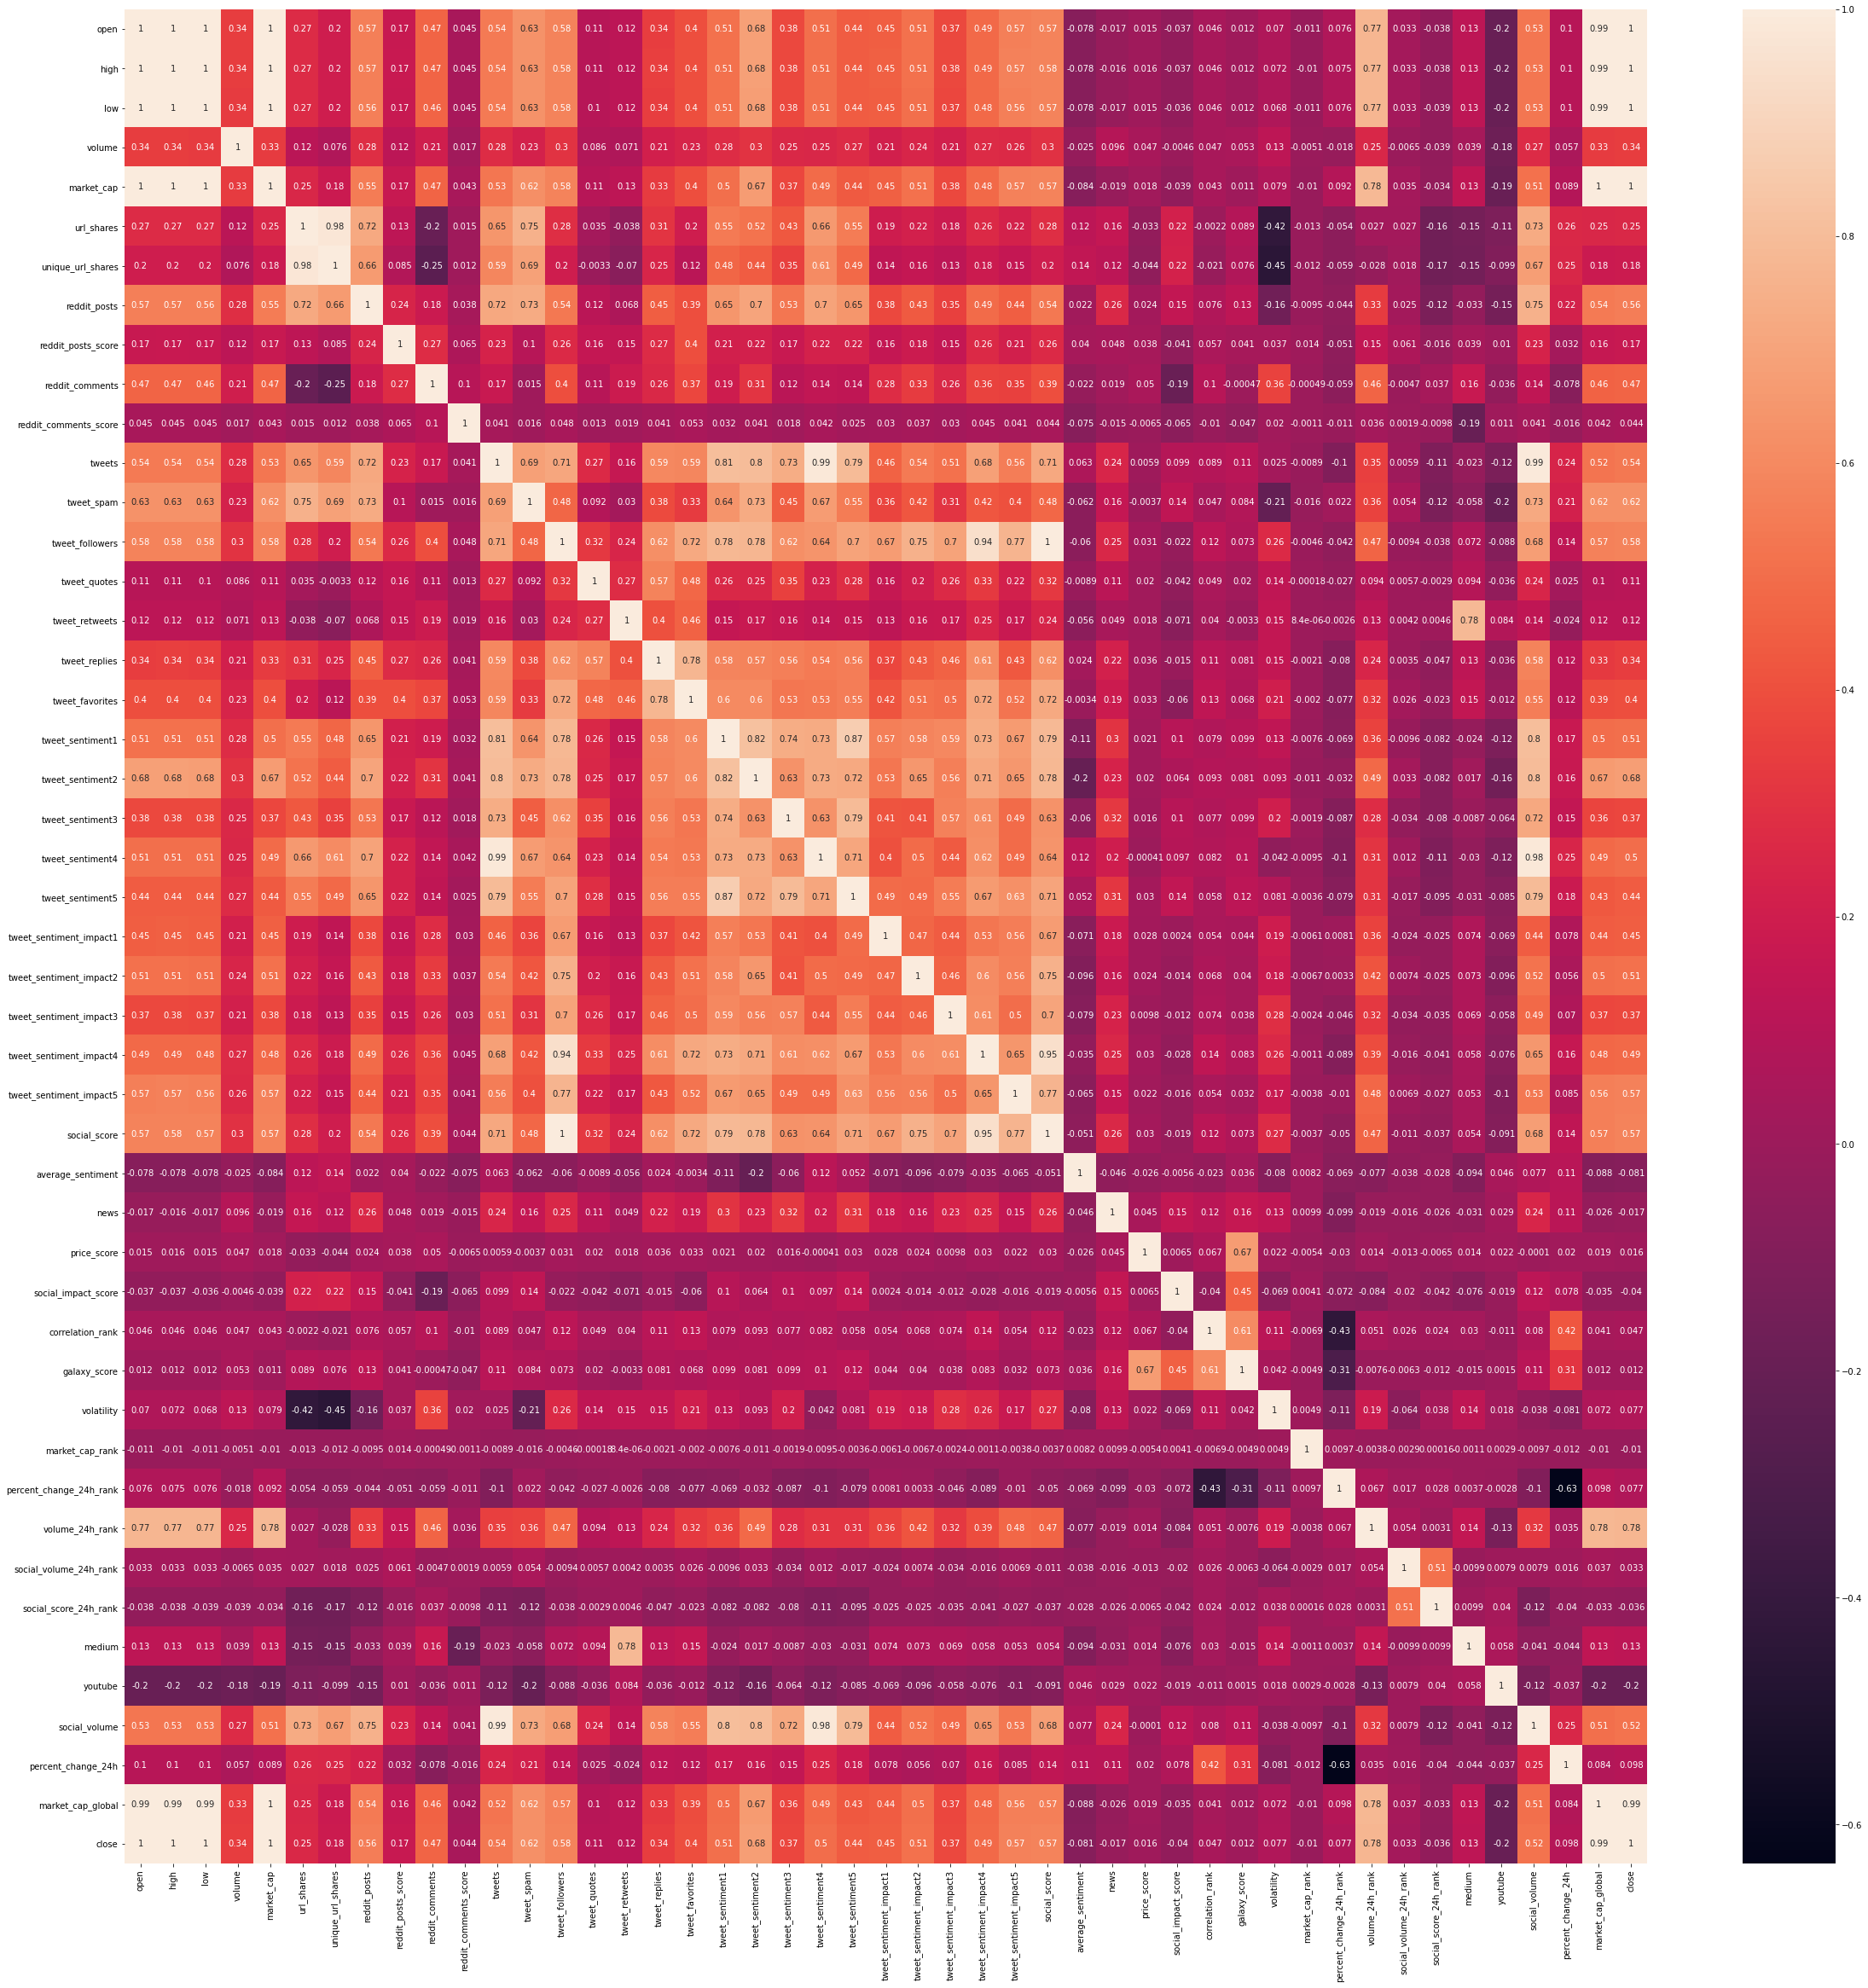

In [57]:
#Plotting a heat map
plt.figure(figsize=(40, 40))

sns.heatmap(crypto_corr, annot = True)

From the correlation matrix and heat map, it is observed that high correlation exists between open, high, low, market_cap, market cap global, url shares and unique url shares. Open, high, low, market cap and market cap global are all correlated to each other while url shares and unique url shares are also correlated to each other.

In [58]:
#specifying columns in X and Y
X = train.drop('close', axis = 1)
Y = train.close

In [59]:
#saving selected column names into a variable name
feature_names = X.columns
feature_names

Index(['open', 'high', 'low', 'volume', 'market_cap', 'url_shares',
       'unique_url_shares', 'reddit_posts', 'reddit_posts_score',
       'reddit_comments', 'reddit_comments_score', 'tweets', 'tweet_spam',
       'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies',
       'tweet_favorites', 'tweet_sentiment1', 'tweet_sentiment2',
       'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5',
       'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
       'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
       'tweet_sentiment_impact5', 'social_score', 'average_sentiment', 'news',
       'price_score', 'social_impact_score', 'correlation_rank',
       'galaxy_score', 'volatility', 'market_cap_rank',
       'percent_change_24h_rank', 'volume_24h_rank', 'social_volume_24h_rank',
       'social_score_24h_rank', 'medium', 'youtube', 'social_volume',
       'percent_change_24h', 'market_cap_global'],
      dtype='object')

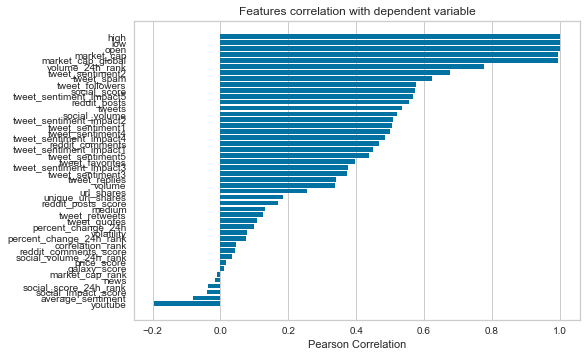

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [60]:
#loading a library for visualization
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(labels=feature_names, method='pearson', sort= True)
visualizer.fit(X, Y)
visualizer.poof()

In [61]:
#calling the correlation scores from the visualization
visualizer.scores_

array([-0.19576837, -0.08142273, -0.03983544, -0.03582953, -0.01692905,
       -0.0103281 ,  0.01162033,  0.01624912,  0.03288269,  0.04416536,
        0.04659316,  0.07657013,  0.07741397,  0.09791821,  0.10633962,
        0.12493006,  0.13104526,  0.16835216,  0.18488692,  0.25371099,
        0.33684604,  0.33961509,  0.37301935,  0.37499951,  0.39788638,
        0.43817284,  0.45066604,  0.46796774,  0.48545664,  0.49893466,
        0.50591142,  0.50964398,  0.51993733,  0.53547243,  0.55647792,
        0.56589611,  0.57435177,  0.57713377,  0.62426646,  0.67675034,
        0.77547133,  0.99446193,  0.99555984,  0.99975513,  0.99976433,
        0.99980284])

In [62]:
#Calling the features
visualizer.features_

array(['youtube', 'average_sentiment', 'social_impact_score',
       'social_score_24h_rank', 'news', 'market_cap_rank', 'galaxy_score',
       'price_score', 'social_volume_24h_rank', 'reddit_comments_score',
       'correlation_rank', 'percent_change_24h_rank', 'volatility',
       'percent_change_24h', 'tweet_quotes', 'tweet_retweets', 'medium',
       'reddit_posts_score', 'unique_url_shares', 'url_shares', 'volume',
       'tweet_replies', 'tweet_sentiment3', 'tweet_sentiment_impact3',
       'tweet_favorites', 'tweet_sentiment5', 'tweet_sentiment_impact1',
       'reddit_comments', 'tweet_sentiment_impact4', 'tweet_sentiment4',
       'tweet_sentiment1', 'tweet_sentiment_impact2', 'social_volume',
       'tweets', 'reddit_posts', 'tweet_sentiment_impact5',
       'social_score', 'tweet_followers', 'tweet_spam',
       'tweet_sentiment2', 'volume_24h_rank', 'market_cap_global',
       'market_cap', 'open', 'low', 'high'], dtype=object)

In [63]:
#creating a dataframe of features and scores
corr_score = pd.DataFrame({'Feature_names' : visualizer.features_,
                         'Scores' : visualizer.scores_})

corr_score

,Feature_names,Scores
0,youtube,-0.195768
1,average_sentiment,-0.081423
2,social_impact_score,-0.039835
3,social_score_24h_rank,-0.035830
4,news,-0.016929
5,market_cap_rank,-0.010328
6,galaxy_score,0.011620
7,price_score,0.016249
8,social_volume_24h_rank,0.032883
9,reddit_comments_score,0.044165


From the correlation matrix, heat map, and visualization, open, high, low , market_cap and market_cap_global show multicollinearity but will not be dropped until feature importance is done because based on domain knowledge these features are important in predicting the target variable.

### Feature Scaling

In [64]:
#Splitting the train set into features and target
train_features = X1_train
train_target = y1_train

In [65]:
#checking the shape
train_features.shape

(8980, 46)

In [66]:
#Checking the shape
train_target.shape

(8980,)

In [67]:
#fitting the scaler and transforming the train features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_train = scaler.fit_transform(train_features)

In [68]:
#checking the shape of the scaled data
scaled_train.shape

(8980, 46)

In [69]:
#Creating a Dataframe of the scaled data
scaled_train_df = pd.DataFrame(scaled_train, columns= train_features.columns)

In [70]:
#checking the head
scaled_train_df.head(5)

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,-0.730823,-0.734677,-0.729004,-0.948308,-0.733519,-0.185800,-0.149765,-0.563830,-0.985358,-0.942538,...,-0.998902,-0.000767,-1.000000,-0.959845,-0.989678,-0.258161,-0.841970,-0.605808,-0.018957,-0.714434
1,-0.872415,-0.874894,-0.871289,-0.993537,-0.880879,-0.260345,-0.185300,-0.691489,-0.850906,-0.877095,...,-0.998902,-0.028138,-0.786590,-0.922715,-0.972804,-0.310406,-0.808724,-0.762302,-0.063799,-0.902987
2,-0.608521,-0.609037,-0.609435,-0.958533,-0.600422,-0.967864,-0.976348,-0.893617,-0.963396,-0.691939,...,-0.997982,-0.029314,-0.720058,-0.937030,-0.936287,-0.275634,-0.812292,-0.978947,-0.076616,-0.612054
3,-0.612418,-0.613211,-0.612973,-0.958530,-0.600409,-0.964592,-0.976513,-0.946809,-0.927685,-0.766959,...,-0.997813,-0.010289,-0.721571,-0.929204,-0.936040,-0.276463,-0.812316,-0.984340,-0.070671,-0.612042
4,-0.870753,-0.874121,-0.869042,-0.995767,-0.875993,-0.229989,-0.126276,-0.382979,-0.981609,-0.904230,...,-0.998902,0.060629,-0.777778,-0.959845,-0.989678,-0.301101,-0.806210,-0.545761,-0.047962,-0.902963


In [71]:
#fitting the scaler and transforming the test set
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_test = scaler.fit_transform(test)

In [72]:
#checking the shape
scaled_test.shape

(6222, 46)

In [73]:
#Creating a Dataframe of the scaled data
scaled_test_df = pd.DataFrame(scaled_test, columns= test.columns)

scaled_test_df.head(5)

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,-0.709497,-0.713057,-0.705015,-0.965002,-0.745317,-0.784995,-0.982804,-0.145699,-0.967537,-0.998167,...,-0.849360,0.058401,-0.609015,-0.444521,-0.466917,0.851963,-0.824767,-0.999884,0.134479,-0.672264
1,-0.771574,-0.774865,-0.766164,-0.973139,-0.836655,0.031204,-0.448064,0.168267,-0.960469,-0.908341,...,-0.995134,0.223397,-0.800000,0.975859,0.894328,0.941947,-0.931652,-0.895289,0.132125,-0.766291
2,-0.949803,-0.952408,-0.946378,-0.957554,-0.964027,-0.139561,-0.732209,-0.123666,-0.966817,-0.946838,...,-0.995134,0.227437,-0.800000,0.975859,0.894328,0.942250,-0.917328,-0.960957,0.199471,-0.959975
3,-0.697833,-0.700292,-0.697138,-0.965057,-0.746106,-0.784769,-0.984545,-0.140190,-0.965736,-0.604033,...,-0.851427,0.025382,-0.600049,-0.445593,-0.468104,0.850246,-0.822884,-0.996762,0.093731,-0.673268
4,-0.707055,-0.710475,-0.703201,-0.965008,-0.745392,-0.781694,-0.984531,-0.041043,-0.967852,-0.941338,...,-0.849116,0.066000,-0.607921,-0.445826,-0.468221,0.851565,-0.824460,-0.999162,0.127568,-0.672357


This test set is kept until after building models and gettting the best model.

### Building Regression models with embedded feature selection methods

In [74]:
#splitting the processed data into features and target
features = scaled_train_df
target = train_target

In [75]:
#distinguishing the features and target as X and Y
X = features
y = train_target

In [76]:
#splitting into train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

X_train.shape, X_test.shape

((7184, 46), (1796, 46))

In [77]:
#importing a library for model building
from sklearn.ensemble import RandomForestRegressor

#defining the random forest model and hyperparameters.
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=5)

#fitting the model to start training.
forest_model = model.fit(X_train, y_train)

#getting the importance of the resulting features.
importances = model.feature_importances_

#creating a data frame for visualization.
final_df = pd.DataFrame({"Features": X_train.columns, "Importances":importances})
final_df.set_index('Importances')

,Features
Importances,
2.930741e-01,open
2.141612e-01,high
3.312566e-01,low
3.696079e-06,volume
1.188834e-02,market_cap
5.123732e-06,url_shares
4.285246e-06,unique_url_shares
6.676640e-07,reddit_posts
5.542685e-06,reddit_posts_score


<AxesSubplot:>

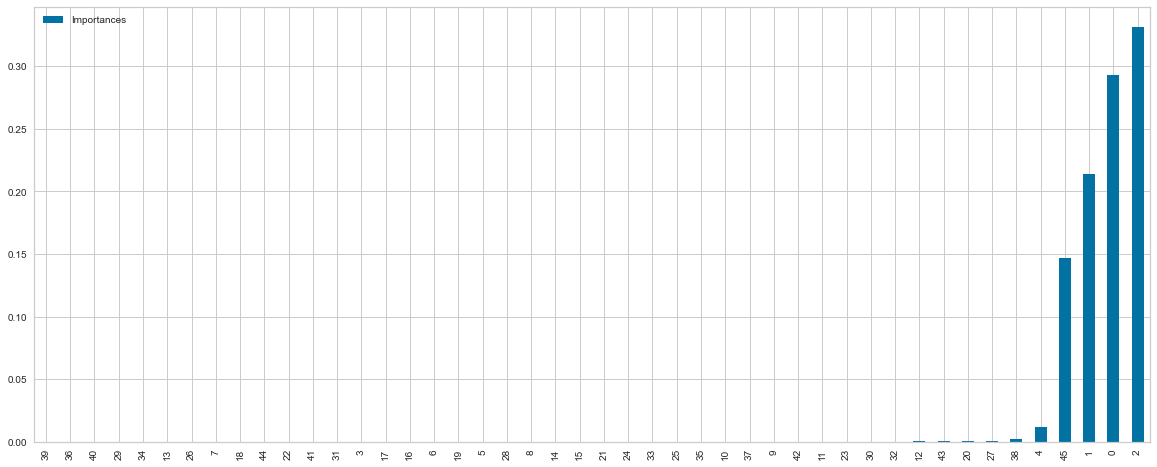

In [78]:
#sorting values in ascending order to better visualization.
final_df = final_df.sort_values('Importances')

#plotting the feature importances in a bar chart.
final_df.plot.bar(figsize = (20,8))

In [79]:
#Getting the training score of the random forest model with all features
print("Training_score : " , forest_model.score(X_train, y_train))

Training_score :  0.9992843816057644


In [80]:
#Using the random forest model to predict the validation set with all features
y_pred = forest_model.predict(X_test)
y_pred

array([15511.25071115,  6816.09883697, 10219.69211267, ...,
       15511.25071115,  9135.16486251, 19212.2409477 ])

In [81]:
#importing libraries for evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

#Evaluating the model
print("Testing_score : ", r2_score(y_test, y_pred))

print("RMSE : ", np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))

Testing_score :  0.9993144358042619
RMSE :  112.04860293832563


From this model evaluation, when all features are used to build the model, the R squared score(0.99) is high but the RMSE(138) is also very high. This shows that the model may be overfit and not efficient when used to predict new data. Therefore, feature selection and hyperparameter tuning is needed.

#### Feature selection using Random forest Regressor embedded method

In [82]:
#Importing library for feature selection
from sklearn.feature_selection import SelectFromModel

In [83]:
#selecting features using SelectFromModel
select = SelectFromModel(forest_model, threshold= None, prefit=True)
sel_X_train = select.transform(X_train)  

#training the model with selected features 
forest_select = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=5) 

#fitting the model to the selected features
forest_select.fit(sel_X_train, y_train)

RandomForestRegressor(max_depth=5, n_jobs=-1)

In [84]:
#Getting the names of the selected features
selected_feat= X_train.columns[(select.get_support())]
len(selected_feat)
print(selected_feat)

Index(['open', 'high', 'low', 'market_cap_global'], dtype='object')


In [85]:
#transforming X_test(validation set) with selected features
sel_X_test = select.transform(X_test)

#using the model with selected features to predict the validation set
y_pred2 = forest_select.predict(sel_X_test)
y_pred2

array([15511.83959278,  6817.66767586, 10212.29563877, ...,
       15511.83959278,  9139.02203187, 19207.7551578 ])

In [86]:
#Getting the score of the random forest training model with selected features
print("Training_score : " , forest_select.score(sel_X_train, y_train))

Training_score :  0.9993400850043095


In [87]:
#Evaluating the model
print("Testing_score : ", r2_score(y_test, y_pred2))

print("RMSE : ", np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred2)))

Testing_score :  0.9993946729141909
RMSE :  105.28765075234895


From the evaluation of this model, the r squared score remained 0.99 but more importantly a drop in test RMSE from 138 to 127 is also observed.

#### Building XGBoost model for Regression

In [88]:
#importing a library for model building
import xgboost as xgb

#defining the xgboost model with hyperparameters.
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.2, max_depth = 5, 
                          alpha = 10, n_estimators = 10)

In [89]:
#fitting the model to start training
xg_model = xg_reg.fit(X_train,y_train)

#Making prediction on the validation set
preds = xg_reg.predict(X_test)
preds

array([13839.664,  6782.984,  8457.198, ..., 13839.664,  8453.47 ,
       16312.719], dtype=float32)

In [90]:
#getting the score of the xgboost training model with all features
print("Training_score : " , xg_model.score(X_train, y_train))

Training_score :  0.8730522831908716


In [91]:
#Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

print("Testing_score : ", r2_score(y_test, preds))

RMSE: 1675.336464
Testing_score :  0.8467362956420177


This model has a good r-squared score of 0.86 for both train and validation test set but an RMSE of 1675 which is even high than that of the random forest model without selected features. Thus, the model accuaracy needs to be improved.

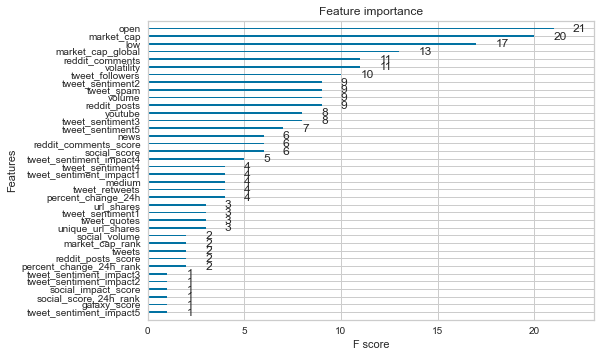

In [92]:
#plotting the feature importances in a bar chart.
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [16, 16]
plt.show()

#### Selecting important features using XGBoost embedded feature selection method

In [93]:
#selecting features using SelectFromModel
selection = SelectFromModel(xg_model, threshold= None, prefit=True)
select_X_train = selection.transform(X_train)

#training the model 
selection_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.2, 
                                   max_depth = 5, alpha = 10, n_estimators = 100)
#Fitting the model
selection_model.fit(select_X_train, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
#transforming X_test with selected features
select_X_test = selection.transform(X_test)

#making predictions using the xgboost model with selected features
xg_preds = selection_model.predict(select_X_test)
xg_preds

array([15507.366,  7023.496,  9980.408, ..., 15506.456,  9098.618,
       19423.947], dtype=float32)

In [95]:
#Getting the score for the xgboost model with selected features
print("Training_score : " , selection_model.score(select_X_train, y_train))

Training_score :  0.9998373872377614


In [96]:
#Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, xg_preds))
print("RMSE: %f" % (rmse))

print("Testing_score : ", r2_score(y_test, xg_preds))

RMSE: 148.822811
Testing_score :  0.9987905880851937


From this model, improved R-squared score (0.86 to 0.99) and RMSE score (1675 to 184) are observed. So the two models are compared to select the final model that will be used to on the test data set

#### Comparing Models using RMSE

In [97]:
#preparing a dataframe for model analysis
models = pd.DataFrame(index=['train_rmse', 'test_rmse','train_rmse_sel_feat','test_rmse_sel_feat'], 
                      columns=['Rand_forest','XGBoost'])
models

,Rand_forest,XGBoost
train_rmse,NaN,NaN
test_rmse,NaN,NaN
train_rmse_sel_feat,NaN,NaN
test_rmse_sel_feat,NaN,NaN


In [98]:
models.loc['train_rmse','Rand_forest'] = np.sqrt(sklearn.metrics.mean_squared_error(y_pred=forest_model.predict(X_train), 
                                                    y_true=y_train))

models.loc['test_rmse','Rand_forest'] = np.sqrt(sklearn.metrics.mean_squared_error(y_pred = forest_model.predict(X_test), 
                                                   y_true=y_test))

models.loc['train_rmse_sel_feat','Rand_forest'] = np.sqrt(sklearn.metrics.mean_squared_error
                                                          (y_pred = forest_select.predict(sel_X_train), y_true=y_train))

models.loc['test_rmse_sel_feat','Rand_forest'] = np.sqrt(sklearn.metrics.mean_squared_error
                                                     (y_pred = forest_select.predict(sel_X_test), y_true=y_test))

In [99]:
models

,Rand_forest,XGBoost
train_rmse,119.569268,NaN
test_rmse,112.048603,NaN
train_rmse_sel_feat,114.821395,NaN
test_rmse_sel_feat,105.287651,NaN


In [100]:
models.loc['train_rmse','XGBoost'] = np.sqrt(sklearn.metrics.mean_squared_error(y_pred = xg_reg.predict(X_train), 
                                                    y_true=y_train))

models.loc['test_rmse','XGBoost'] = np.sqrt(sklearn.metrics.mean_squared_error(y_pred = xg_reg.predict(X_test), 
                                                   y_true=y_test))

models.loc['train_rmse_sel_feat','XGBoost'] = np.sqrt(sklearn.metrics.mean_squared_error
                (y_pred  = selection_model.predict(select_X_train), y_true=y_train))

models.loc['test_rmse_sel_feat','XGBoost'] = np.sqrt(sklearn.metrics.mean_squared_error
                                                     (y_pred  = selection_model.predict(select_X_test), y_true=y_test))

In [101]:
models

,Rand_forest,XGBoost
train_rmse,119.569268,1592.543374
test_rmse,112.048603,1675.336464
train_rmse_sel_feat,114.821395,56.997543
test_rmse_sel_feat,105.287651,148.822811


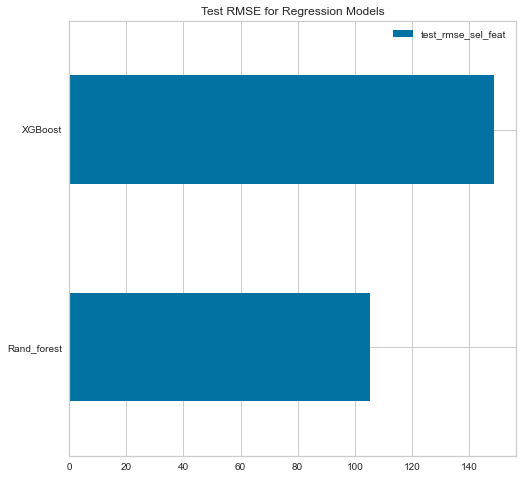

In [102]:
fig, ax = plt.subplots(figsize=(8,8))
models.loc['test_rmse_sel_feat'].plot(kind='barh')
ax.set_title('Test RMSE for Regression Models')
ax.legend(loc=1, ncol=4);

From the comparison of the models using their rmse and visualization, the candidate model is the random forest model with selected features because it has the lowest rmse value. However, it shows overfitting so cross validation and hyperparameter tuning will be done before using it to predict the test set

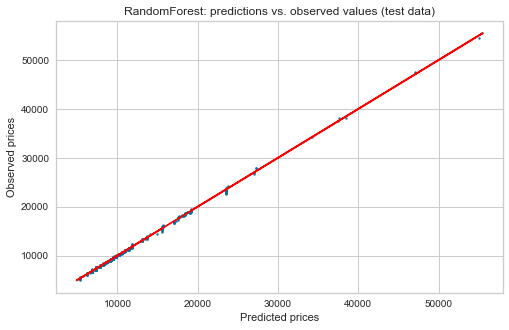

In [103]:
#Visualizing the actaul vs predicted prices
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(forest_select.predict(sel_X_test), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('RandomForest: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted prices')
ax.set_ylabel('Observed prices');

After visualizing the regression curve of the selected model, the model shows overfitting. Thus, cross validation with hyperparamter tuning will be done to solve the problem of overfitting and help the model make good predictions when used on the test data

#### Cross validation with hyperparameter tuning

In [104]:
from sklearn.model_selection import KFold
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 7184, Test set:1796
Fold:2, Train set: 7184, Test set:1796
Fold:3, Train set: 7184, Test set:1796
Fold:4, Train set: 7184, Test set:1796
Fold:5, Train set: 7184, Test set:1796


In [105]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, tree, ensemble
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')
score = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), X, y, 
                        cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score}')
rmse(score.mean())

Scores for each fold are: [-13061.45408011  -3269.80331937   -977.73562065  -3231.20406439
  -3601.50442691]
rmse= 69.49


In [106]:
estimators = [50, 100, 150, 200]

for count in estimators:
    score = cross_val_score(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), X, y, 
                            cv= kf, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    rmse(score.mean())

For estimators: 50
rmse= 72.60
For estimators: 100
rmse= 69.49
For estimators: 150
rmse= 70.89
For estimators: 200
rmse= 71.37


In [107]:
max_depth = [3, 5, 7, 10, 12, 15]

for count in max_depth:
    score = cross_val_score(ensemble.RandomForestRegressor(max_depth = count, random_state= 42), X, y, 
                            cv= kf, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    rmse(score.mean())

For estimators: 3
rmse= 630.17
For estimators: 5
rmse= 128.68
For estimators: 7
rmse= 75.10
For estimators: 10
rmse= 72.95
For estimators: 12
rmse= 74.80
For estimators: 15
rmse= 74.97


cross validation shows that the best parameters for the selected model is n_estimators= 100 and max_depth = 10. Therefore, the hyperparameters will be tuned based on this result and fit into the entire dataset before predicting the test set

#### Predicting the Test set

In [108]:
#selecting features from the test set based on feature importance
select_test = scaled_test_df[['open','high','low','market_cap_global']]
select_test

,open,high,low,market_cap_global
0,-0.709497,-0.713057,-0.705015,-0.672264
1,-0.771574,-0.774865,-0.766164,-0.766291
2,-0.949803,-0.952408,-0.946378,-0.959975
3,-0.697833,-0.700292,-0.697138,-0.673268
4,-0.707055,-0.710475,-0.703201,-0.672357
...,...,...,...,...
6217,-0.880667,-0.883891,-0.876118,-0.908841
6218,-0.788124,-0.791766,-0.782941,-0.777514
6219,-0.700549,-0.703241,-0.698983,-0.673027
6220,-0.703366,-0.706172,-0.701502,-0.672823


In [109]:
#Defining X and y
X = features
y = train_target

In [110]:
#Transforming the features
sel_X = select.transform(X)  

#Defining the model 
best_model = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=10) 
best_model.fit(sel_X, y)

RandomForestRegressor(max_depth=10, n_jobs=-1)

In [111]:
#making live predictions on the actual test set using the selected model
pred_close = best_model.predict(select_test)
pred_close

array([12341.62939079, 10777.84504497,  5923.63670606, ...,
       12816.60011865, 12753.61935195,  6675.61962442])

In [112]:
#evaluating the modeltraining
print("Training_score : " , best_model.score(sel_X, y))

Training_score :  0.999983861453741


In [113]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_pred = best_model.predict(sel_X), y_true=y)))

17.80581276230647


In [114]:
test['id'] = test_id
test['pred'] = pred_close
test

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,...,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,id,pred
0,13080.931093,13100.442513,13045.340385,1.300203e+09,2.780995e+11,-4391.808948,-441.720392,7.0,56.0,2.000000,...,2.954925,-57.836121,-11.881823,-67.599794,28.277047,9.0,-0.477196,4.534009e+11,ID_323Sn2,12341.629391
1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.000000,1045.000000,64.0,213.0,51.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,7245.0,-0.555698,3.631052e+11,ID_325SNW,10777.845045
2,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.000000,255.000000,11.0,72.0,30.000000,...,2.000000,1.000000,1.000000,1.231122,4.655398,2702.0,1.689370,1.771075e+11,ID_325uzE,5923.636706
3,13408.951150,13461.612444,13265.637671,1.298625e+09,2.775122e+11,-4390.132518,-446.559583,8.0,96.0,217.000000,...,2.999754,-57.880531,-11.893054,-68.908613,28.757744,225.0,-1.835592,4.524367e+11,ID_328qCx,12816.600119
4,13149.598897,13173.508891,13096.069896,1.300028e+09,2.780435e+11,-4367.315344,-446.522812,26.0,49.0,33.000000,...,2.960397,-57.890171,-11.894165,-67.903265,28.355364,59.0,-0.707583,4.533107e+11,ID_3293uJ,12341.629391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,8266.942912,8266.942912,8259.796103,3.100637e+08,1.491229e+11,618.000000,438.000000,15.0,202.0,42.000000,...,2.000000,1.000000,1.000000,1.889760,3.775877,1494.0,-0.967973,2.262125e+11,ID_zufSPk,7827.253868
6218,10869.612767,10873.493490,10865.827625,6.989360e+08,2.011601e+11,1608.000000,911.000000,84.0,204.0,45.000000,...,2.000000,1.000000,1.000000,1.382401,6.000000,7065.0,1.140794,3.523272e+11,ID_zuz9yf,10356.811547
6219,13332.569823,13378.183713,13214.048356,1.299005e+09,2.776527e+11,-4391.308272,-444.903284,8.0,139.0,167.000000,...,2.989737,-57.885206,-11.893660,-68.757234,28.721399,175.0,-1.526149,4.526673e+11,ID_zvrMSX,12816.600119
6220,13253.346067,13295.232526,13143.599729,1.299384e+09,2.777739e+11,-4546.214506,-477.431241,6.0,85.0,149.120624,...,3.009293,-59.490432,-12.245114,-70.536100,29.360558,6.0,-1.440658,4.528639e+11,ID_zy9Cfv,12753.619352


In [115]:
sub_file = test[['id','pred']]
sub_file

,id,pred
0,ID_323Sn2,12341.629391
1,ID_325SNW,10777.845045
2,ID_325uzE,5923.636706
3,ID_328qCx,12816.600119
4,ID_3293uJ,12341.629391
...,...,...
6217,ID_zufSPk,7827.253868
6218,ID_zuz9yf,10356.811547
6219,ID_zvrMSX,12816.600119
6220,ID_zy9Cfv,12753.619352
